# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd #импортируем библиотеку pandas
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib.pyplot
import matplotlib #импортируем библиотеку matplotlib

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")


#### Считаем данные из csv-файла в датафрейм и сохраним в переменную data

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t') #сохраняем в датафрейм
data.head() # выведем первые 5 строк для ознакомления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Выведем основную информацию о датафрейме с помощью метода info()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменим название одного столбца: cityCenters_nearest на city_сenters_nearest   

In [5]:
data.columns = data.columns.str.replace('cityCenters', 'city_centers')

#### Построим общую гистограмму для всех числовых столбцов таблицы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

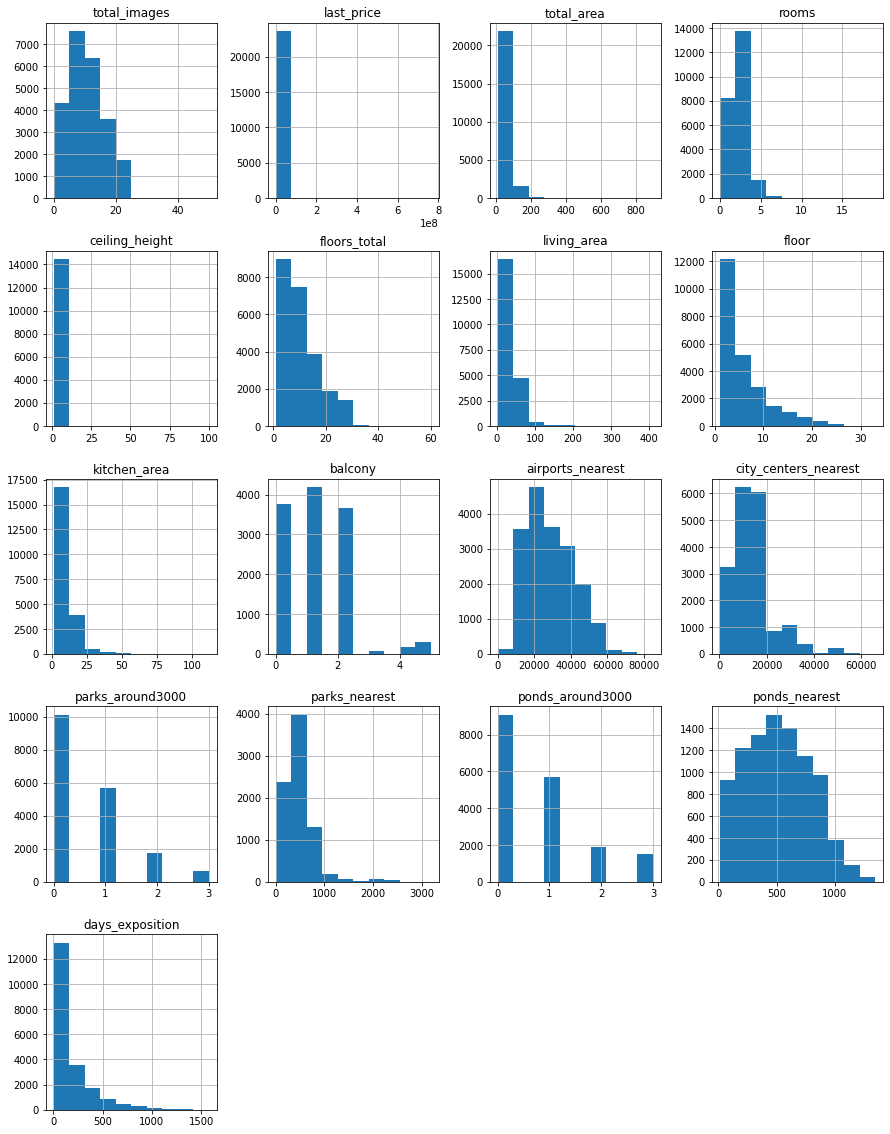

In [6]:
data.hist(figsize=(15, 20))

### Предобработка данных

#### Выведем количество пропущенных значений для каждого столбца

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Определили столбцы, в которых есть пропуски. Так же посчитали количество пропусков. 
По характеру распределения пропусков можно предположить, что данные не были внесены пользователями при заполнении данных. 
По пропускам в картографических данных можно предположить, что была некорректная выгрузка данных.


In [8]:
data.loc[data['locality_name'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


##### Заполним пропуски в столбце balcony

In [9]:
data['balcony'].unique() #посмотрим на список уникальных значений в столбце

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Получили значения nan,  2,  0,  1,  5,  4,  3. nan заменим на 0, если нет данных, скорее всего балкон отсутствует:

In [10]:
data['balcony']=data['balcony'].fillna(0)
data['balcony'].unique() #проверим замену

array([0., 2., 1., 5., 4., 3.])

Имеет смысл изменить тип данных в столбце для удобства дальнейшей обработки, значения в столбце только целые числа

In [11]:
data['balcony'] = data['balcony'].astype(int)

##### Заполним пропуски в столбце parks_around3000

Так же поступим со столбцом parks_around3000, пропуск значит их отсутсвие

In [12]:
data['parks_around3000'].unique() # Проверяем значения в столбце
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['parks_around3000'].unique() # проверим значения в столбце

array([1., 0., 2., 3.])

Имеет смысл изменить тип данных в столбце для удобства дальнейшей обработки, значения в столбце только целые числа

In [13]:
data['parks_around3000'] = data['parks_around3000'].astype(int)

##### Заполним пропуски в столбце ponds_around3000

Аналогично поступим с пропусками в ponds_around3000

In [14]:
data['ponds_around3000']=data['ponds_around3000'].fillna(0) #изменим тип данных
data['ponds_around3000'].unique()# выведем уникальные значения

array([2., 0., 3., 1.])

Имеет смысл изменить тип данных в столбце для удобства дальнейшей обработки, значения в столбце только целые числа

In [15]:
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Пропуски в картографических данных: растояние до центра, аэропорта и водоема, оставим без изменения, их некорректно заполнять средним либо медианой. 



##### Заполним пропуски в столбце is_apartment

Пропущенные значения заменим на False, предположим, что если ничего не указано, то это не аппартаменты

In [16]:
data['is_apartment']=data['is_apartment'].fillna(False)
data['is_apartment'].unique() # проверим значения в столбеце на пропуски

array([False,  True])

Логично изменить тип данных на bool, так как значения в ячейке только булевы

In [17]:
data['is_apartment'] = data['is_apartment'].astype(bool)

##### Вывод: 
В первоначальном варианте проекта были заполнены пропуски в столбцах, информацию в них вносили пользователи:  
- в is_apartment и balcony пропуски заменили на False и 0 соответственно, предпологая, что отсутствие значения означает не апратаменты и отсутсвие балконов. Сразу изменили тип данных, соответственно данным в столбцам;
- в столбцах ponds_around3000 и parks_around3000 пропуски так же заменнили на 0, считая что отсутсвие данных означает отсутствие водоемов и парков. Тип данных так же изменили соответственно данным в столбцах;
- в столбце locality_name пропуски заменить мы не можем, и использовать информацию в других столбцах тоже, так как нет привязки в н.п. Удалим эти строки;
- в floors_total так же есть пропуски, их оставляем без изменения, заполнить их нечем, тип данных не меняем, так как есть пропуски;
- в days_exposition пропуски так же оставляем без изменений. Возможно владельцы не закрыли объявление после продажи, в более свежих объявлениях пропуск может означать, что недвижимость еще не продана.

Анализ параметров отдельно и связи между ними показал, количество пропусков составляет весомую часть от общей информации и их заполнение привело к некоторому искажению выводов. В итоге пропуски в:
- ceiling_height (пропусков 39%);
- living_area (пропусков 8%);
- kitchen_area (пропусков 9.6 %);

оставим без изменеия, чтобы правильно определить зависимости. В остальных столбцах заполним пропуски и поменяем тип данных.
    
Пропуски в картографических данных: растояние до центра, аэропорта, парка и водоема, оставим без изменения, их некорректно заполнять средним либо медианой. Удалять строки с пропусками тоже не будем, иначе мы потеряем больше 50% информации. В этих строках содержится другая важная информация.

#### Изменения типа данных в столбце first_day_exposition

Для удобства обработки значений в столбце изменим тип данных на datetime

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#data_no['first_day_exposition'] = pd.to_datetime(data_no['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Выведем информацию о датафрейме, проверим изменились ли типы данных

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Изменив типы данных в столбцах, где это логично было сделать, можно заметить, что с изменением данных так же уменьшился объем  занимаемой памяти, в случае больших таблиц, это тоже важно.

#### Поиск и удаление дубликатов

Проверим датафрейм на наличие полных дубликатов

In [20]:
data.duplicated().sum()

0

Подробнее рассмотрим столбец locality_name, выведем уникальные значения

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

При изучении списка уникальных значений выявили следующие типы дубликатов:
- различные названия поселков: городской поселок и поселок городсвого типа
- написание одинаковых типов насленных пунктов через буквы е либо ё
- поселок Мурино и Мурино

Удалим найденные дубликаты:

In [22]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data.loc[data['locality_name']=='Мурино','locality_name'] = 'поселок Мурино'

Проверим выполнение замен

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

После удаления неявных дубликатов еще раз проверим датафрейм на наличие полных дубликатов:

In [24]:
data.duplicated().sum()

0

#### Устранение редких и выбивающихся значений (аномалии) в столбцах

Для того, чтобы найти аномалии, воспользуемся методом describe(), который дает числовое описание данных

In [25]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

В столбце total_images есть несколько сток со значением, гораздо большим, чем среднее значение. Удалять их не будем, они не повлияют результатт анализа. 

In [26]:
#посчитаем, сколько объявлений имеют значения в total_images за пределами нормальных значений
data[data['total_images']>=26]['total_images'].count() 

30

In [27]:
data['last_price'].describe() 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [28]:
data[data['last_price']>=700000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0


В столбце last_price есть выбивающиеся значения 12190.0 и 763000000.0. Строку с минимальных значением удалим, это будет не критично для анализа (в данных двухкомнатная квартира в Санкт-Петербурге, стоимость не может быть 12 т.р.). Строку со слишком высокой стоимостью оставим(общая площадь квартиры 400 кв.м., 7 комнат, возможно владелец установил именно такую цену), но при анализе отфильтруем это значение вместе с значениями, выходящими за пределами нормальных значений

In [29]:
data['total_area'].describe() 

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [30]:
data[data['total_area']>115]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
19,16,14200000.0,121.00,2019-01-09,3,2.75,16.0,76.0,8,False,False,False,12.00,0,Санкт-Петербург,38900.0,12843.0,0,NaN,0,NaN,97.0
35,6,15500000.0,149.00,2017-06-26,5,NaN,5.0,104.0,4,False,False,False,17.00,0,Санкт-Петербург,23670.0,3502.0,0,NaN,1,779.0,644.0
42,13,22000000.0,161.80,2015-07-08,4,2.80,4.0,80.9,2,False,False,False,17.60,5,Петергоф,35416.0,30605.0,2,47.0,1,907.0,987.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.0,4,False,False,False,50.00,0,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23574,14,64990000.0,139.00,2015-11-24,3,3.00,8.0,3.0,8,False,False,False,16.00,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0
23590,0,21187872.0,123.30,2017-04-25,3,NaN,NaN,50.4,18,False,False,False,23.60,0,Санкт-Петербург,19095.0,4529.0,0,NaN,0,NaN,104.0
23600,8,8700000.0,132.00,2018-11-13,3,2.65,9.0,78.0,3,False,False,False,10.00,0,Санкт-Петербург,45157.0,17882.0,0,NaN,0,NaN,60.0
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,False,False,15.60,0,Санкт-Петербург,11827.0,11459.0,0,NaN,0,NaN,NaN


В столбце total_area есть строки с выбивающимися значениями. Удалять не будем, площадь квартиры соответсвует цене и количеству комнат. Но при анализе отфильтруем.

In [31]:
data['rooms'].describe()


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В столбце rooms есть строки с выбивающимися значениями, гораздо большим, чем среднее значение(195 строка). Удалять не будем, площадь квартиры в этих строках позволяет разместить это количество комнат, возможно это в прошлом коммунальные квартиры, которые объединили.

In [32]:
data[data['rooms']>=6]['rooms'].count()

195

In [33]:
data[data['rooms']==0]# посчитаем количество строк, с условием: в столбце rooms 0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,False,True,NaN,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,False,True,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,False,True,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


В данных присутсвуют 0, при анализе данных по столбцу studio и open_plan в этих строках,выяснили, что эти данные относятся к студиям и объектам с открытой планировкой. Оставим их без изменений. 

In [34]:
#выведем число строк, при условии, что кол-во комнат = 0 и открытая планировка либо студия
data.loc[(data['rooms']==0) & ((data['studio']==True) | (data['open_plan']==True)),'studio'].count()

197

In [35]:
data['ceiling_height'].describe() 


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Выведем выбивающиеся значения отдельно. Возьмем интервал от 5 м. Допустим, что в каких то домах есть высокие потолки, частные дома/коттеджи.

In [36]:
data[data['ceiling_height']>=5].head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
1053,13,550000.0,29.0,2018-02-01,1,5.0,3.0,NaN,1,False,False,False,NaN,0,Бокситогорск,NaN,NaN,0,NaN,0,NaN,6.0
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,NaN,6,False,False,False,NaN,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0


Рассмотрим строки, в которых значения в столбце ниже 2.2 м.

In [37]:
data[data['ceiling_height']<2.2].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30,1,2.0,15.0,17.5,6,False,False,False,6.5,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27,3,2.0,5.0,40.0,4,False,False,False,6.0,1,Луга,NaN,NaN,0,NaN,0,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.0,18.0,16.6,9,False,False,False,8.8,2,Тосно,NaN,NaN,0,NaN,0,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14,2,1.2,2.0,27.5,1,False,False,False,5.2,0,поселок городского типа Мга,NaN,NaN,0,NaN,0,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29,1,2.0,5.0,NaN,5,False,False,False,NaN,0,Луга,NaN,NaN,0,NaN,0,NaN,100.0


In [38]:
data[data['ceiling_height']>5].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,NaN,6,False,False,False,NaN,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN


Строки со значением больше 5 м оставим, при анализе отфильтруем их. Строку со значением 100 удалим, значение совершенно не правдоподобно. Удалим так же строки со значениями меньше 2 м, находится в таких помещениях уже проблематично.  Таких строк мало, большой потери информации не будет. Удалим ниже по проекту.

Проверим столбец floor, нет ли в нем значений больше, чем общая этажность здания floors_total

In [39]:
data[data['floor'] > data['floors_total']]['floor'].count()

0

Некорректных значений нет

In [40]:
data['floors_total'].describe() 

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

В столбце floors_total есть несколько сток со значением, гораздо большим, чем среднее значение. Удалять их не будем, они выгледят вполне правдоподобно. 
При анализе можем их отфильровать.

In [41]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Рассмотрим максимальные значения:

In [42]:
data[data['living_area']>=300]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391.0
4237,1,50000000.0,517.0,2017-10-14,7,NaN,4.0,332.0,3,False,False,False,22.0,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.5,7,False,False,False,25.0,0,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,14.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
14088,8,51000000.0,402.0,2017-02-07,6,3.15,8.0,300.0,6,False,False,False,56.0,2,Санкт-Петербург,24484.0,5052.0,1,253.0,0,NaN,32.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


Информация похожа на достоверную, размеру площади соответствует количество комнат и цена. 

Имеет смысл удалить строки с жилой площадью меньше 5 кв.м. Меньше площадь уже не пригодна для жизни.

In [43]:
data[data['living_area']<=5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17.0,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6.0,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25.0,5.0,8,False,True,False,NaN,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24.0,2.0,22,False,True,False,NaN,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24,3,3.0,8.0,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0


In [44]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Выбивающиеся большие значения относятся к недвижимости большой по площади, т.е. может быть правдой. А вот значения меньше 4 кв.м. уже меньше похоже на правду. Строки с такими данными удалим.

In [45]:
data[data['kitchen_area']<4].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.0,27.0,2017-07-10,1,2.75,23.0,18.0,18,False,False,False,2.0,0,Санкт-Петербург,22131.0,17459.0,0,NaN,1,411.0,10.0
2165,15,3180000.0,25.0,2019-03-21,1,2.50,25.0,17.0,17,False,False,False,3.0,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,19.0
3078,17,6000000.0,43.0,2018-11-12,2,2.90,4.0,29.3,2,False,False,False,3.2,0,Санкт-Петербург,22357.0,5247.0,1,319.0,2,831.0,37.0
3195,17,2690000.0,25.6,2018-02-19,1,2.50,9.0,16.2,7,False,False,False,3.8,0,Санкт-Петербург,11033.0,11281.0,0,NaN,1,283.0,99.0
6084,6,770000.0,18.0,2017-10-16,1,NaN,5.0,13.0,4,False,False,False,3.0,0,Тихвин,NaN,NaN,0,NaN,0,NaN,90.0


Проверим так же данные на условие того, что общая площадь должна быть >= сумме жилой площади и площади кухни. 

In [46]:
data[(data['kitchen_area']+data['living_area']) > data['total_area']].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14,1,2.65,9.0,26.10,5,False,False,False,6.20,0,Санкт-Петербург,13952.0,15031.0,0,NaN,1,824.0,12.0
545,9,4700000.0,23.80,2018-12-28,1,NaN,18.0,20.00,9,False,False,False,5.00,0,Санкт-Петербург,9731.0,11849.0,0,NaN,0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08,1,2.70,19.0,30.55,2,False,False,False,9.28,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,70.0
601,12,5600000.0,53.70,2017-04-18,2,2.50,12.0,48.30,5,False,False,False,7.00,2,Санкт-Петербург,50477.0,13252.0,2,220.0,1,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27,1,2.64,25.0,23.43,25,False,False,False,23.43,2,Санкт-Петербург,43396.0,12153.0,0,NaN,0,NaN,574.0


Получили 64 строки с некорректными площадями. Поскольку неизвество в какой площади ошибка, лучше удалить данные, т.к. цена недвижимости сильно зависит от общей площади/жилой/кухни, оставив эти строки можем сделать неправильные выводы.

In [47]:
data['balcony'].describe()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

Рассмотрим данные, где количество балконов выбивается. Возьмем >=4, количество, которое является маловеротным.

In [48]:
data[data['balcony']>=4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04,3,NaN,14.0,59.0,8,False,False,False,12.0,5,Санкт-Петербург,37715.0,12612.0,1,725.0,1,759.0,179.0
42,13,22000000.0,161.80,2015-07-08,4,2.80,4.0,80.9,2,False,False,False,17.6,5,Петергоф,35416.0,30605.0,2,47.0,1,907.0,987.0
116,18,10999000.0,97.20,2017-11-13,3,2.50,16.0,NaN,16,False,False,False,18.3,5,Санкт-Петербург,19426.0,21138.0,0,NaN,2,390.0,394.0
121,20,33000000.0,180.00,2017-02-17,3,2.90,9.0,86.0,8,False,False,False,24.0,4,Санкт-Петербург,25689.0,4264.0,1,633.0,0,NaN,144.0
250,13,3200000.0,51.70,2019-01-22,2,2.65,16.0,29.2,5,False,False,False,7.7,4,Всеволожск,NaN,NaN,0,NaN,0,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000.0,52.00,2019-04-21,1,2.70,16.0,28.0,8,False,False,False,11.0,5,поселок Мурино,NaN,NaN,0,NaN,0,NaN,NaN
23474,16,5900000.0,40.50,2019-03-16,2,2.73,17.0,31.0,16,False,False,False,5.0,4,Санкт-Петербург,19901.0,21613.0,0,NaN,1,1003.0,NaN
23497,17,6150000.0,55.40,2019-04-22,2,2.80,20.0,29.4,16,False,False,False,9.6,4,Санкт-Петербург,16285.0,13873.0,0,NaN,1,481.0,NaN
23526,14,5800000.0,60.69,2018-03-13,3,2.50,9.0,39.7,2,False,False,False,6.2,5,Санкт-Петербург,51239.0,15954.0,0,NaN,0,NaN,30.0


Таких строк 487. Данные по балконам нам не требуются для дальнейшего анализа, поэтому удалять их не будем. Иначе, необходимо рассмотреть этот столбец более детально, в некоторых строках (например №41 total_area = 74, rooms = 3, а балконов целых 5) при небольших жилых площадях-5 балконов, что не может быть достоверным. 

In [49]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [50]:
data[data['city_centers_nearest']>=60000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7,4000000.0,59.0,2017-07-23,3,2.50,5.0,37.0,1,False,False,False,7.0,0,поселок Молодежное,84665.0,65764.0,0,NaN,0,NaN,NaN
2974,13,3200000.0,46.3,2018-03-31,2,2.50,3.0,29.2,2,False,False,False,7.0,1,Зеленогорск,81355.0,62454.0,0,NaN,0,NaN,205.0
5218,15,3650000.0,53.8,2018-09-24,3,2.50,4.0,36.9,3,False,False,False,5.2,0,поселок Молодежное,83758.0,64857.0,0,NaN,0,NaN,121.0
5340,19,3600000.0,50.6,2019-03-19,2,2.50,5.0,29.9,4,False,False,False,7.0,1,поселок Молодежное,84853.0,65952.0,0,NaN,0,NaN,NaN
9640,8,4200000.0,51.4,2014-12-10,2,2.55,5.0,31.0,2,False,False,False,6.0,1,поселок Молодежное,84869.0,65968.0,0,NaN,0,NaN,1194.0
16569,13,3200000.0,52.8,2017-06-20,2,2.55,5.0,29.9,3,False,False,False,8.3,0,Ломоносов,53042.0,61495.0,2,223.0,0,NaN,240.0
18884,15,3600000.0,57.6,2019-02-08,3,2.55,3.0,41.3,2,False,False,False,6.5,1,Зеленогорск,81607.0,62706.0,0,NaN,0,NaN,13.0
20746,1,3300000.0,43.5,2016-02-16,2,2.55,4.0,27.2,2,False,False,False,5.0,1,поселок Молодежное,84006.0,65105.0,0,NaN,0,NaN,1043.0
23123,0,1800000.0,32.0,2018-07-17,1,NaN,2.0,17.0,1,False,False,False,6.0,0,Ломоносов,56896.0,60223.0,1,17.0,0,NaN,147.0


В столбце city_centers_nearest данные выгдядят правдоподобно, большие выбивающиеся значения относятся к одним н.п.

In [51]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [52]:
data[data['airports_nearest']>=70000].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
302,6,3500000.0,31.0,2016-04-05,1,2.55,5.0,17.5,1,False,False,False,5.4,0,Зеленогорск,72005.0,53104.0,3,92.0,1,571.0,168.0
376,18,8400000.0,84.0,2018-06-26,2,2.75,3.0,41.0,1,False,False,False,13.0,0,Зеленогорск,73827.0,54926.0,0,NaN,0,NaN,201.0
577,7,4000000.0,59.0,2017-07-23,3,2.50,5.0,37.0,1,False,False,False,7.0,0,поселок Молодежное,84665.0,65764.0,0,NaN,0,NaN,NaN
939,17,3015000.0,31.2,2019-04-16,1,2.50,3.0,17.5,1,False,False,False,5.8,0,Зеленогорск,75646.0,56745.0,0,NaN,1,347.0,NaN
2036,19,6100000.0,50.0,2018-03-24,2,2.60,5.0,29.0,5,False,False,False,9.0,1,Зеленогорск,71618.0,52717.0,3,37.0,1,926.0,72.0


В столбце airports_nearest данные выгдядят правдоподобно, большие выбивающиеся значения относятся к одним н.п., удаленным от аэропорта. Удалим только одну строку со значеним 0. В аэропорту квартиры быть не может.

In [53]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [54]:
data[data['parks_nearest']>=3000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11,2,NaN,18.0,37.0,13,False,False,False,10.0,0,Санкт-Петербург,14878.0,9791.0,0,3064.0,1,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21,1,NaN,5.0,17.7,2,False,False,False,5.5,0,Санкт-Петербург,14821.0,9734.0,0,3190.0,1,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12,5,3.0,2.0,80.0,2,False,False,False,17.0,1,Санкт-Петербург,36805.0,8656.0,0,3013.0,3,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22,1,2.6,5.0,16.5,1,False,False,False,5.5,0,Санкт-Петербург,14821.0,9734.0,0,3190.0,1,431.0,176.0


В столбце parks_nearest данные выгдядят правдоподобно, большие выбивающиеся значения относятся к одним н.п.

In [55]:
data['parks_around3000'].describe() 

count    23699.000000
mean         0.469049
std          0.748534
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

В столбце parks_around3000 аномалий не обнаружено

In [56]:
data['ponds_around3000'].describe() 

count    23699.000000
mean         0.590911
std          0.883999
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

В столбце ponds_around3000 аномалий не обнаружено

In [57]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [58]:
data[data['ponds_nearest']>=900].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
39,15,5200000.0,54.4,2018-11-29,2,2.75,9.0,29.7,2,False,False,False,8.8,2,Санкт-Петербург,13413.0,12209.0,0,NaN,1,1175.0,29.0
42,13,22000000.0,161.8,2015-07-08,4,2.80,4.0,80.9,2,False,False,False,17.6,5,Петергоф,35416.0,30605.0,2,47.0,1,907.0,987.0
44,13,5350000.0,40.0,2018-11-18,1,NaN,22.0,NaN,3,False,False,False,NaN,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
55,20,7400000.0,58.8,2018-03-24,2,2.60,10.0,33.7,9,False,False,False,10.7,0,Санкт-Петербург,10643.0,12260.0,0,NaN,1,998.0,69.0
74,3,2350000.0,34.0,2018-06-14,1,2.50,9.0,19.0,8,False,False,False,7.1,0,Колпино,26765.0,32551.0,1,445.0,1,996.0,121.0


В столбце ponds_nearest данные выгдядят правдоподобно, большие выбивающиеся значения относятся к одним н.п.

Удалим найденные аномалии путем создания нового датафрейма, чтобы не потерять первоначальную информацию

Для начала удалим  строки с подозрительно низкой ценой, высоту потолков = 100 м и < 2 м и с жилой площадью/площадью кухни < 5 м, а так же с рассояние до аэропорта  = 0:


In [59]:
#Сделаем это с помощью среза 
data_filtr = data[(data['last_price'] != 12190.0) | (data['last_price'].isna())]
data_filtr = data_filtr[(data['ceiling_height'] != 100) & (data['ceiling_height'] > 2) | (data['ceiling_height'].isna())]
data_filtr = data_filtr[(data['kitchen_area'] > 5) | (data['kitchen_area'].isna())]
data_filtr = data_filtr[(data['airports_nearest'] != 0) | (data['airports_nearest'].isna())]

Теперь удалим строки, в которых отсутствует название населенного пункта:

In [60]:
data_filtr.dropna(subset=['locality_name'], inplace=True)

Удалим строки, где сумма жилой площади и кухни больше общей площади:

In [61]:
data_filtr = data_filtr[((data_filtr['kitchen_area']+data_filtr['living_area']) <= data_filtr['total_area']) \
| (data['kitchen_area'].isna()) | (data['living_area'].isna()) | (data['total_area'].isna())]                       



In [62]:
data_filtr.head()  # проверим сколько строк осталось после удаления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Осталось 23108 строк из 23699, удалено около 2.5% первоначальной информации, некритично. 

### Посчитайте и добавьте в таблицу новые столбцы

Добавим новые столбцы в таблицу:

In [63]:
data_filtr['square_meter_price'] = data_filtr['last_price']/data_filtr['total_area'] # цена одного квадратного метра

In [64]:
data_filtr['day_exposition'] = data_filtr['first_day_exposition'].dt.dayofweek #день недели публикации объявления

In [65]:
data_filtr['month'] = data_filtr['first_day_exposition'].dt.month #месяц публикации объявления

In [66]:
data_filtr['year'] = data_filtr['first_day_exposition'].dt.year #год публикации объявления

In [67]:
#расстояние до центра города в километрах
data_filtr['city_centers_nearest_km'] = round(data_filtr['city_centers_nearest']/1000) #расстояние до центра города в километрах

Для присвоения категории этажам напишем функцию:

In [68]:
# функция floor 
def floor(row):
    try:
        floor = row['floor']
        floors_total = row['floors_total']

        if floor == 1:
            return 'первый'

        if floor >= 2:
            if floor == floors_total:
                return 'последний'

        return 'другой'

    except:
        pass


Применим функцию floor к столбцу floor_type:

In [69]:
data_filtr['floor_type'] = data_filtr.apply(floor, axis=1)

In [70]:
data_filtr.head() # выведем полученный результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,14.0,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,7.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,8.0,другой


### Проведите исследовательский анализ данных

#### Изучим параметры объектов. Для постоения диаграмм будем отбрасывать значения больше либо меньше нормальных. Для вычисления значений используем диаграмму размаха

##### Столбец total_area общая площадь:

<AxesSubplot:>

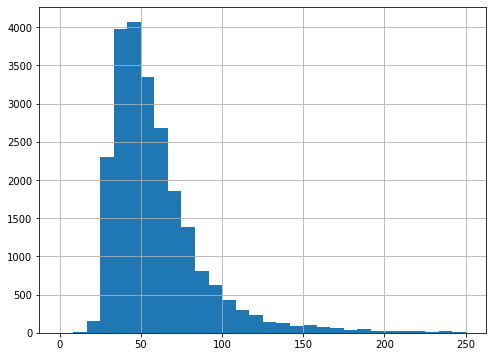

In [71]:
data_filtr['total_area'].hist(bins=30, range=(0,250), figsize=(8,6)) # отсеим редкие значения, зададим значение по оси

<AxesSubplot:>

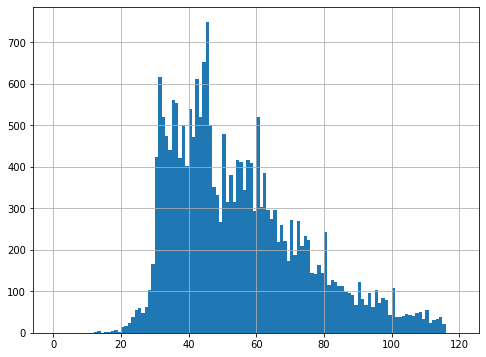

In [72]:
data_filtr.query('total_area >= 12 and total_area <= 115')['total_area'].hist(bins=120, range=(0,120), figsize=(8,6))
# отсеим выбивающиеся значения, зададим значение по оси

In [73]:
data_filtr['total_area'].describe() 

count    23108.000000
mean        60.740216
std         35.892919
min         12.000000
25%         40.000000
50%         52.200000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [74]:
data_filtr['total_area'].value_counts().head()

45.0    406
42.0    358
60.0    340
31.0    329
44.0    313
Name: total_area, dtype: int64

По гистограмме можно сказать, что основная часть недвижимости имеет площадь от 30 кв.м. до 70 кв.м. с пиком в 45 кв.м и 60 кв.м, после начинает снижаться. Число объектов недвижимости площадью от 30 и меньше резко падает. Наблюдается большой провал на 49 кв.м.

##### Столбец living_area жилая площадь:

<AxesSubplot:>

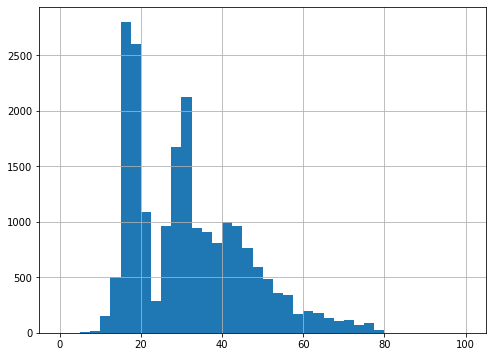

In [75]:
data_filtr[(data_filtr['living_area'] <= 78) | (data_filtr['living_area'].isna())]['living_area'].\
hist(bins=40, range=(0,100), figsize=(8,6))

In [76]:
data_filtr['living_area'].describe()

count    21218.000000
mean        34.580457
std         22.212883
min          2.000000
25%         18.600000
50%         30.000000
75%         42.600000
max        409.700000
Name: living_area, dtype: float64

In [77]:
data_filtr.pivot_table(index=['living_area','rooms'], values='total_images', aggfunc='count').\
sort_values(by='total_images').tail(15)

,,total_images
living_area,rooms,
42.0,3,175
33.0,2,193
43.0,3,204
32.0,2,283
27.0,2,283
15.0,1,292
29.0,2,294
19.0,1,302
31.0,2,352


По гистограмме можно сказать, что основная часть недвижимости имеет жилую площадь от 15 кв.м до 42 кв.м с пиком в 18 кв.м и 30 кв.м. , больше всего как раз 1 и 2х комнатный объектов недвижимости, после начинает снижаться. 

##### Столбец kitchen_area площадь кухни:

<AxesSubplot:>

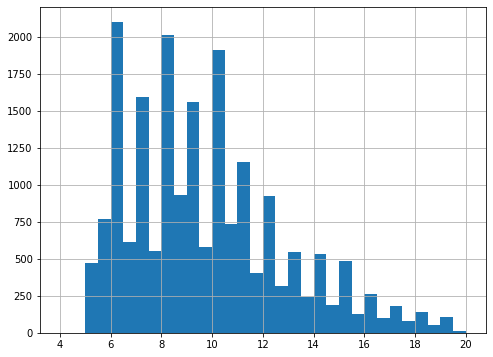

In [78]:
data_filtr[(data_filtr['kitchen_area'] <= 19.5) | (data_filtr['kitchen_area'].isna())]['kitchen_area'].\
hist(bins=32, range=(4,20), figsize=(8,6))


In [79]:
data_filtr['kitchen_area'].describe()

count    20841.000000
mean        10.682439
std          5.887263
min          5.040000
25%          7.200000
50%          9.300000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [80]:
data_filtr['kitchen_area'].value_counts().head(15)

6.0     1293
10.0    1257
8.0     1104
9.0     1095
7.0     1061
11.0     791
12.0     658
8.5      414
5.5      399
14.0     381
15.0     351
13.0     322
6.3      296
6.2      281
8.3      269
Name: kitchen_area, dtype: int64

Наиболее часто встречающаяся недвижимость с площадью кухни от 7 до 12 кв.м, далее идет плавное снижение. Наблюдаем пики в значения 6, 8 и 10 кв.м

##### Столбец last_price цена объекта:

Для постоения следующей диаграммы переведем стоимость недвижимости из рублей в млн. рублей

In [81]:
data_filtr['last_price'] = data_filtr['last_price']/1000000 #разделим значение в ячейке last_price на 1000000

<AxesSubplot:>

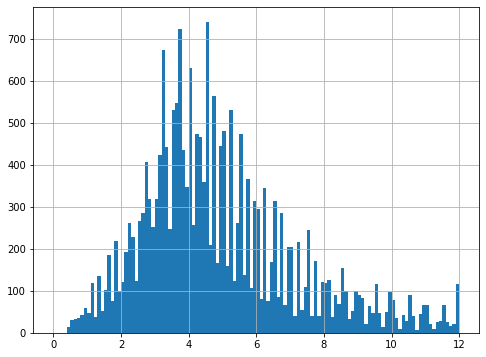

In [82]:
data_filtr[(data_filtr['last_price'] <= 12) & (data_filtr['last_price'] >= 0.43)]['last_price'].\
hist(bins=120, range=(0,12), figsize=(8,6))

In [83]:
data_filtr['last_price'].describe() 

count    23108.000000
mean         6.610661
std         11.008665
min          0.430000
25%          3.480000
50%          4.695000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

In [84]:
data_filtr['last_price'].value_counts().head(20)

4.5    338
3.5    276
4.2    255
4.3    254
4.0    252
3.6    250
3.2    233
3.8    233
3.3    231
4.1    231
3.7    224
5.5    223
3.4    219
3.9    217
4.6    213
3.1    206
5.2    201
5.0    197
4.8    197
5.1    192
Name: last_price, dtype: int64

Стоимость основной части недвижимости находится в интервале 3.4-6.8 млн. 

##### Столбец rooms колиество комнат:

<AxesSubplot:>

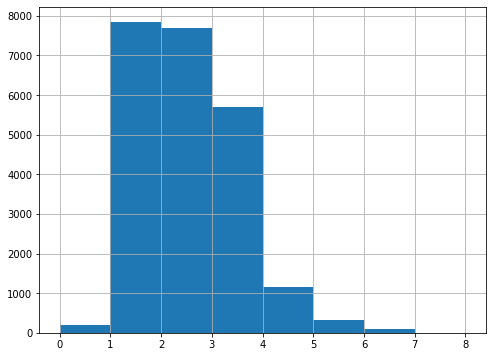

In [85]:
data_filtr[data_filtr['rooms'] <= 6]['rooms'].hist(bins=8, range=(0,8), figsize=(8,6) )

In [86]:
data_filtr['rooms'].describe()

count    23108.000000
mean         2.074217
std          1.082716
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [87]:
data_filtr.pivot_table(index='rooms', values='total_images', aggfunc='count').sort_values(by='rooms')

,total_images
rooms,
0,197
1,7838
2,7700
3,5690
4,1165
5,325
6,105
7,58
8,11


В данных наиболее распространены 1-комнатные и 2х комнатные объекты недвижимости. Начиная с 4х комнатных и далее идет разкий спад количества.

##### Столбец ceiling_height высота потолка:

<AxesSubplot:>

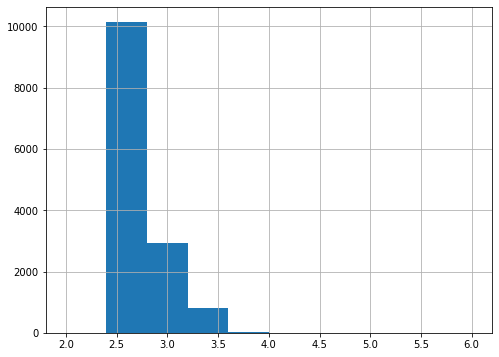

In [88]:
data_filtr[data_filtr['ceiling_height'] <= 3.6]['ceiling_height'].hist(bins=10, range=(2,6), figsize=(8,6) )

In [89]:
data_filtr['ceiling_height'].describe()

count    14156.000000
mean         2.765458
std          0.934954
min          2.250000
25%          2.530000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

Основная часть недвижимости имеет высоту потолков от 2.4 до 2.8 м. Так же много недвижимости с высотой потолка 2.8-3.2 м.

##### Столбец floor этаж квартиры

<AxesSubplot:>

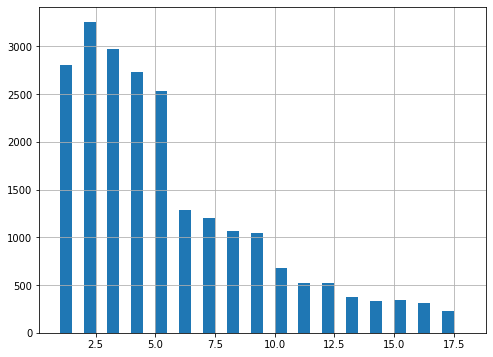

In [90]:
data_filtr[data_filtr['floor'] <= 17]['floor'].hist(bins=34, range=(1,18), figsize=(8,6) )

In [91]:
data_filtr['floor'].describe()

count    23108.000000
mean         5.931496
std          4.896499
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Основная часть объектов недвижимости находится с 1 по 5 этаж, начиная с 6 этажа и выше количество падает.

##### Столбец floor_type тип этажа квартиры:

<AxesSubplot:>

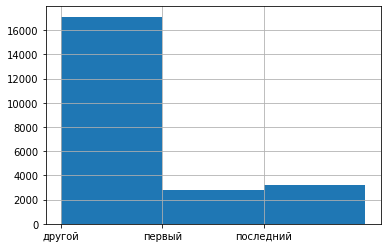

In [92]:
data_filtr['floor_type'].hist(bins=3, range=(0,3))

In [93]:
data_filtr.pivot_table(index='floor_type', values='total_images', aggfunc='count').sort_values(by='floor_type')

,total_images
floor_type,
другой,17109
первый,2801
последний,3198


Больше всего в базе недвижимости, которая имеет тип этажа - другой.

##### Столбец floors_total общее количество этажей в доме:

Удалим строки с пустыми ячейками в столбце floors_total:

In [94]:
data_filtr_floors_total = data_filtr
data_filtr_floors_total.dropna(subset=['floors_total'], inplace=True)
data_filtr_floors_total.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,14.0,другой
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,7.0,другой
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,8.0,другой


<AxesSubplot:>

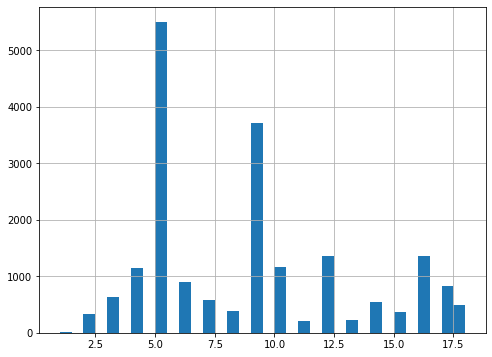

In [95]:
data_filtr_floors_total[data_filtr_floors_total['floors_total'] <= 33]['floors_total'].\
hist(bins=34, range=(1,18), figsize=(8,6))

In [96]:
data_filtr_floors_total['floors_total'].describe()

count    23024.000000
mean        10.762205
std          6.590837
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [97]:
data_filtr_floors_total['floors_total'].value_counts().head(10)

5.0     5501
9.0     3722
16.0    1363
12.0    1352
10.0    1170
4.0     1153
25.0    1066
6.0      892
17.0     827
3.0      631
Name: floors_total, dtype: int64

Больше всего недвижимости в 5 и 9 этажных домах.

##### Столбец city_centers_nearest расстояние до центра города:

<AxesSubplot:>

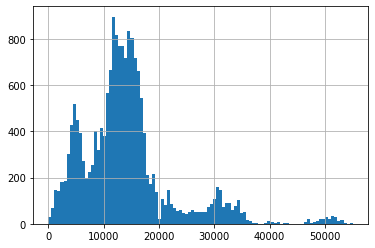

In [98]:
data_filtr['city_centers_nearest'].hist(bins=100, range=(0,55000))

<AxesSubplot:>

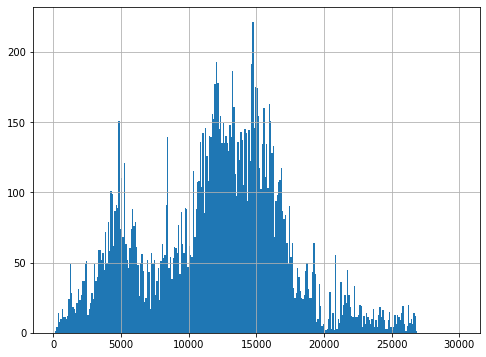

In [99]:
data_filtr[(data_filtr['city_centers_nearest'] <= 26800) & (data_filtr['city_centers_nearest'] >= 181)]['city_centers_nearest'].hist(bins=300, range=(0,30000), figsize=(8,6) )


<AxesSubplot:>

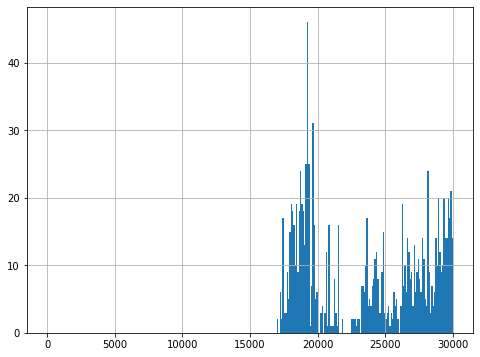

In [100]:
data_filtr[(data_filtr['city_centers_nearest'] <= 36800) \
           & (data_filtr['city_centers_nearest'] >= 0)&\
           (data_filtr['locality_name']!= 'Санкт-Петербург')]['city_centers_nearest'].\
hist(bins=300, range=(0,30000), figsize=(8,6))

<AxesSubplot:>

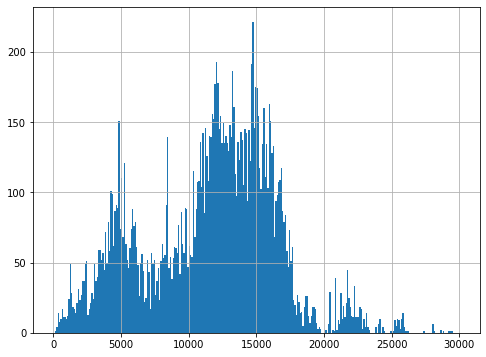

In [101]:
data_filtr[(data_filtr['city_centers_nearest'] <= 36800) &\
           (data_filtr['city_centers_nearest'] >= 181)&\
           (data_filtr['locality_name'] == 'Санкт-Петербург')]['city_centers_nearest'].\
hist(bins=300, range=(0,30000), figsize=(8,6) )

In [102]:
data_filtr['city_centers_nearest'].describe()

count    17720.000000
mean     14100.100056
std       8488.883704
min        181.000000
25%       9196.000000
50%      13073.000000
75%      16238.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [103]:
data_filtr['city_centers_nearest_r'] = round(data_filtr['city_centers_nearest']/1000)
data_filtr['city_centers_nearest_r'].value_counts().tail(20)
data_filtr[(data_filtr['city_centers_nearest_r'] <= 26.800) & \
           (data_filtr['city_centers_nearest_r'] >= 0.181)]['city_centers_nearest_r'].\
value_counts().tail(25)

15.0    1536
13.0    1434
14.0    1266
16.0    1246
11.0    1147
5.0      904
17.0     885
10.0     701
4.0      677
6.0      608
8.0      585
9.0      574
7.0      417
18.0     373
19.0     354
3.0      347
2.0      307
22.0     216
1.0      190
21.0     163
20.0     119
23.0     114
24.0     111
26.0     102
25.0      72
Name: city_centers_nearest_r, dtype: int64

In [104]:
data_filtr[(data_filtr['city_centers_nearest'] >= 6500) & (data_filtr['city_centers_nearest'] <= 7100)\
& (data_filtr['city_centers_nearest'] >= 181)].sort_values(by='ponds_nearest',ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type,city_centers_nearest_r
870,11,5.89,65.0,2015-11-18,3,2.65,16.0,39.5,1,False,False,False,10.75,0,Санкт-Петербург,29236.0,6608.0,1,737.0,1,1199.0,222.0,90615.384615,2,11,2015,7.0,первый,7.0
2222,6,3.70,31.0,2017-12-05,1,2.50,5.0,18.0,4,False,False,False,5.50,0,Санкт-Петербург,30497.0,6582.0,0,NaN,1,1075.0,8.0,119354.838710,1,12,2017,7.0,другой,7.0
17058,2,4.50,48.0,2017-05-23,2,3.15,5.0,26.0,1,False,False,False,8.00,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,238.0,93750.000000,1,5,2017,7.0,первый,7.0
13915,20,6.35,52.0,2018-02-06,2,3.00,6.0,2.0,2,False,False,False,9.00,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0,122115.384615,1,2,2018,7.0,другой,7.0
1230,1,10.00,100.6,2016-03-22,4,NaN,6.0,60.0,3,False,False,False,27.00,0,Санкт-Петербург,28335.0,6638.0,1,377.0,1,1009.0,142.0,99403.578529,1,3,2016,7.0,другой,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20137,14,8.00,93.0,2017-06-26,3,NaN,9.0,64.0,3,False,False,False,9.00,0,Санкт-Петербург,16285.0,6664.0,2,295.0,0,NaN,185.0,86021.505376,0,6,2017,7.0,другой,7.0
21118,7,5.10,85.0,2017-06-01,3,NaN,3.0,52.0,3,False,False,False,8.00,1,Санкт-Петербург,16228.0,7055.0,1,505.0,0,NaN,33.0,60000.000000,3,6,2017,7.0,последний,7.0
21654,9,3.60,31.0,2018-11-12,1,2.55,9.0,16.0,9,False,False,False,7.00,0,Санкт-Петербург,15359.0,6940.0,1,420.0,0,NaN,21.0,116129.032258,0,11,2018,7.0,последний,7.0
21752,12,4.00,31.0,2018-09-06,1,2.50,9.0,15.7,6,False,False,False,7.10,0,Санкт-Петербург,15359.0,6940.0,1,420.0,0,NaN,220.0,129032.258065,3,9,2018,7.0,другой,7.0


Основная часть недвижимости находится на удалении от центра 9 - 16 км. С увеличением расстояния от центра, количество объектов уменьшается. Наблюдается небольшой провал на расстоянии 5-11 км, минимум на 7 км, его обеспечивает Санкт-Петербург. Возможно это сказываются его географические особенности, вблизи 7 км водоемы расположены очень близко, меньше места для застройки. Пик на 17м км - к объектам в Санкт-Петербурге добавляются объекты соседних н.п.

##### Столбец airports_nearest расстояние до ближайшего аэропорта:

<AxesSubplot:>

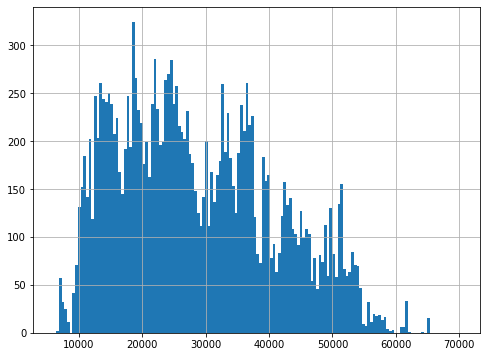

In [105]:
data_filtr[(data_filtr['airports_nearest'] <= 65200) & (data_filtr['airports_nearest'] >= 6450)]['airports_nearest'].\
hist(bins=150, range=(6000,70000), figsize=(8,6) )


In [106]:
data_filtr['airports_nearest'].describe()

count    17697.000000
mean     28832.126745
std      12585.829340
min       6450.000000
25%      18625.000000
50%      26798.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

При удалении от аэропорта после 25000 м идет уменьшение количества объектов недвижимости. На графике видим несколько провалов.

##### Столбец parks_nearest расстояние до ближайшего парка:

<AxesSubplot:>

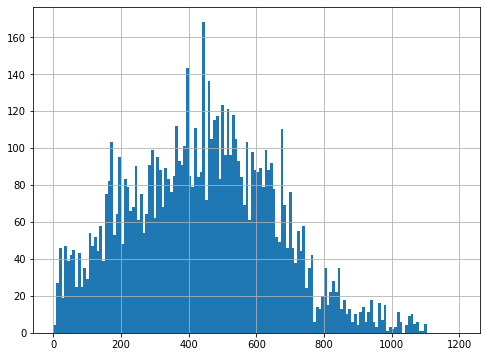

In [107]:
data_filtr[(data_filtr['parks_nearest'] <= 1100) & (data_filtr['parks_nearest'] >= 1)]['parks_nearest'].\
hist(bins=150, range=(0,1200), figsize=(8,6) )


In [108]:
data_filtr['parks_nearest'].describe()

count    7875.000000
mean      491.341714
std       343.008913
min         1.000000
25%       287.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Большинство объектов недвижимости находится рядом с парками, в пределах 600 м

##### Столбец day_exposition день размещения объявления:

<AxesSubplot:>

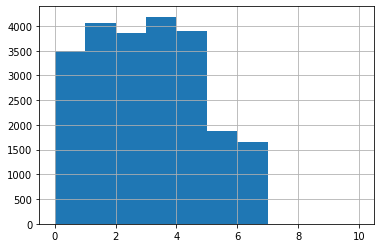

In [109]:
data_filtr['day_exposition'].hist(bins=10, range=(0,10))

In [110]:
data_filtr['day_exposition'].describe()

count    23024.000000
mean         2.571273
std          1.788192
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_exposition, dtype: float64

Чаще всего объявления размещались в рабочие дни, больше всего во вторник и четверг.

##### Столбец month месяц размещения объявления:

<AxesSubplot:>

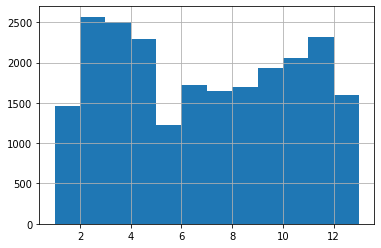

In [111]:
data_filtr['month'].hist(bins=12, range=(1,13))

In [112]:
data_filtr['month'].describe()

count    23024.000000
mean         6.407054
std          3.494954
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [113]:
data_filtr['month'].value_counts().head(10)

2     2568
3     2504
11    2321
4     2296
10    2062
9     1930
6     1716
8     1700
7     1642
12    1600
Name: month, dtype: int64

Больше всего объявлений опубликовано с февраля по апрель и с октябрь по ноябрь

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

Построим гистограмму:

<AxesSubplot:>

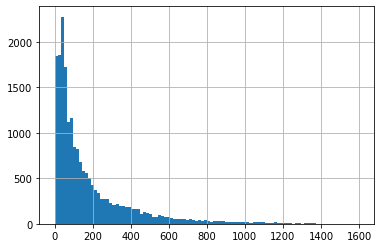

In [114]:
data_filtr['days_exposition'].hist(bins=100, range=(0,1600))

<AxesSubplot:>

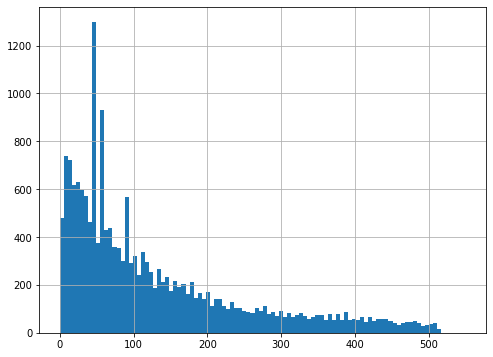

In [115]:
data_filtr[(data_filtr['days_exposition'] <= 515) & (data_filtr['days_exposition'] >= 1)]['days_exposition'].\
hist(bins=100, range=(0,550), figsize=(8,6) )


In [116]:
data_filtr['days_exposition'].describe()

count    19928.000000
mean       180.848806
std        219.742796
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [117]:
data_filtr['days_exposition'].value_counts().head(10)

45.0    859
60.0    529
7.0     222
30.0    206
90.0    195
4.0     171
3.0     153
5.0     152
14.0    140
9.0     138
Name: days_exposition, dtype: int64

Среднее значение по столбцу days_exposition- количество дней размещения 181.9 дня, медиана 96 дней. Быстрые продажи происходили в течении 45 дней (первый квартиль). Необычно долгие продажи начинаются от 515 дней (третий квартиль+1.5межквартального размаха). Так же наблюдаем несколько выбросов. Возможно объявления закрывались автоматически в эти дни, заканчивался срок размещения объявления.

#### Рассмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта 

##### Рассмотрим зависимость общей (полной) стоимости от общей площади:

(-10.0, 600.0)

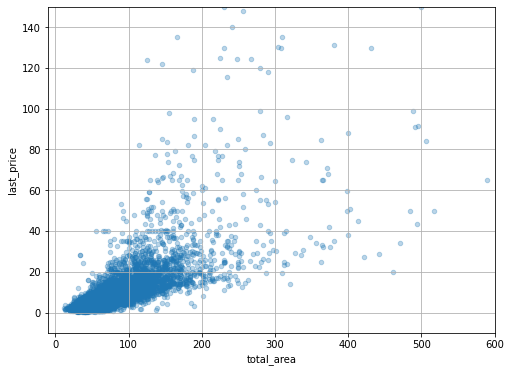

In [118]:
data_filtr.plot(x='total_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True, alpha=0.3)

plt.ylim(-10,150)
plt.xlim(-10,600)

Ограничим значения "усами"

(0.0, 120.0)

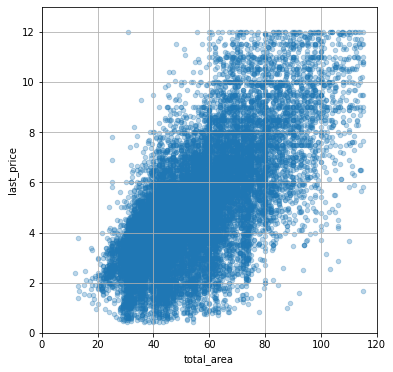

In [119]:
data_filtr.query('total_area <= 115 and last_price <= 12').\
plot(x='total_area', y='last_price', kind='scatter', figsize=(6, 6), grid=True, alpha=0.3)
plt.ylim(0,13)
plt.xlim(0,120)

In [120]:
data_filtr['total_area'].corr(data_filtr['last_price']) # вычислим коэффициент Пирсона

0.6533823171763399

In [121]:
#Посчитаем коэффициент Пирсона для отфильтрованных данных
data_filtr.query('total_area <= 115 and last_price <= 12')['total_area'].\
corr(data_filtr.query('total_area <= 115 and last_price <= 12')['last_price'])

0.6995446886241754

Из полученных данных можно сделать вывод, что связь между данными есть и ее можно назвать сильной - коэффициент корреляции почти 0.7.

##### Рассмотрим зависимость общей (полной) стоимости от жилой площади:

(-10.0, 500.0)

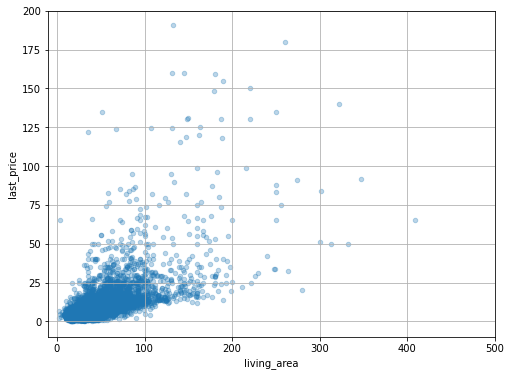

In [122]:
data_filtr.plot(x='living_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True, alpha=0.3)
plt.ylim(-10,200)
plt.xlim(-10,500)

Ограничим значения "усами"

(0.0, 80.0)

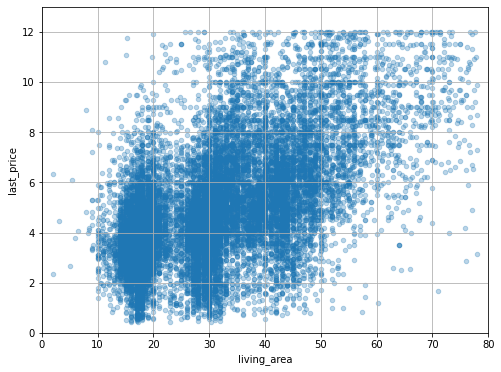

In [123]:
data_filtr.query('living_area <= 78 and last_price <= 12').plot\
(x='living_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True, alpha=0.3)
plt.ylim(0,13)
plt.xlim(0,80)


In [124]:
data_filtr['living_area'].corr(data_filtr['last_price'])# вычислим коэффициент Пирсона

0.5664464242552109

In [125]:
##Посчитаем коэффициент Пирсона для отфильтрованных данных
data_filtr.query('living_area <= 78 and last_price <= 12')['living_area'].\
corr(data_filtr.query('living_area <= 78 and last_price <= 12')['last_price'])

0.5805828557174182

Из полученных данных можно сделать вывод, что связь между данными есть, но не слишком сильная. В основном, при увеличении жилой площади увеличивается стоимость, но не всегда. Так же можно заметить, что для одинаковой жилой площи есть большой разброс цен с провалами. Скорее всего это из-за того, что 1 и 2х комнатные квартиры имеют в среднем одинаковую площадь - как раз провал между 1 и 2х комнатными, а на разброс цены влияют третьи факторы. Для объектов с 4 и более комнатами таких скоплений уже нет, их доля меньше, чем 1,2 и 3х комнатных.

##### Рассмотрим зависимость общей (полной) стоимости от площади кухни:

(-10.0, 200.0)

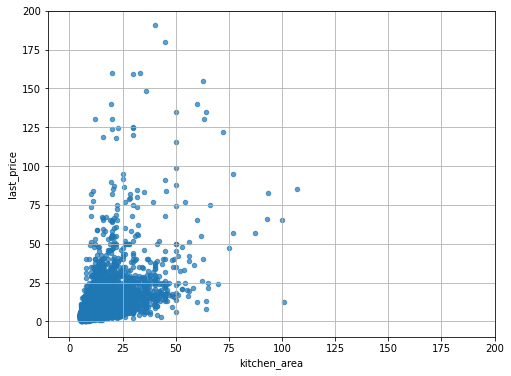

In [126]:
data_filtr.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)
plt.ylim(-10,200)
plt.xlim(-10,200)

Ограничим значения "усами"

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

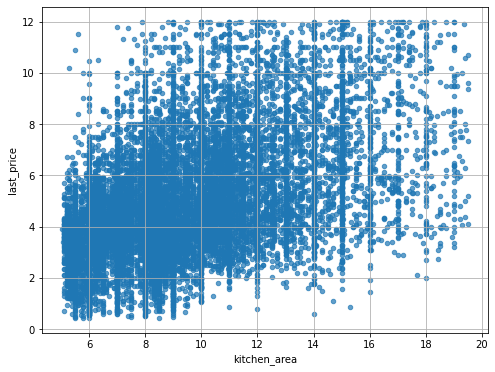

In [127]:
data_filtr.query('kitchen_area <= 19.5 and last_price <= 12').plot\
(x='kitchen_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

In [128]:
data_filtr['kitchen_area'].corr(data_filtr['last_price'])# вычислим коэффициент Пирсона

0.5217371132945887

In [129]:
#Посчитаем коэффициент Пирсона для отфильтрованных данных

data_filtr.query('kitchen_area <= 19.5 and last_price <= 12')['kitchen_area'].\
corr(data_filtr.query('kitchen_area <= 19.5 and last_price <= 12')['last_price'])

0.4839801665751836

Из полученных данных можно сделать вывод, что связь между данными есть, но  не слишком сильная и слабее, чем с параметрами выше. В основном, при увеличении жилой площади увеличивается стоимость, но не всегда. Так же можно заметить, что при увеличении площади кухни растет разброс цен.

##### Рассмотрим зависимость общей (полной) стоимости от количества комнат:

(0.0, 450.0)

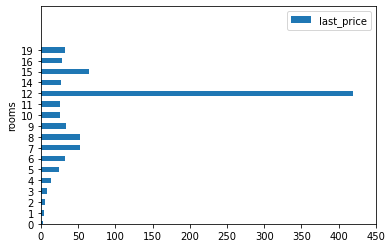

In [130]:
data_filtr.pivot_table(index='rooms', values='last_price', aggfunc='mean').\
sort_values(by='rooms').plot(kind='barh', fontsize=10)
plt.ylim(0,20)
plt.xlim(0,450)

Ограничим значения "усами"

<AxesSubplot:ylabel='rooms'>

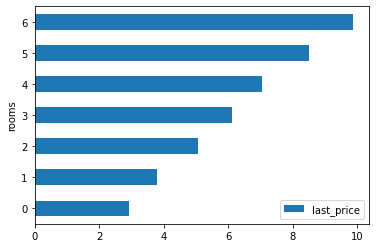

In [131]:
data_filtr.query('rooms <= 6 and last_price <= 12').\
pivot_table(index='rooms', values='last_price', aggfunc='mean').sort_values(by='rooms').plot(kind='barh', fontsize=10)


In [132]:
data_filtr['rooms'].corr(data_filtr['last_price'])# вычислим коэффициент Пирсона

0.3639530840956515

In [133]:
#Посчитаем коэффициент Пирсона для отфильтрованных данных

data_filtr.query('rooms <= 6 and last_price <= 12')['rooms'].\
corr(data_filtr.query('rooms <= 6 and last_price <= 12')['last_price'])

0.46104206035836925

Из полученных данных можно сделать вывод, что связь между данными есть, но не слишком сильная. В основном, при увеличении количества комнат, увеличивается стоимость. Разница в стоимости между объектами недвижимости с количеством комнат 0 и 1 не значительна, но  тут нужно отметить, что общая площадь в квартирах-студиях в среднем немного больше. Если рассмотреть график без фильтрации ( но уберем 2 самых дорогих объекта недвижимости 15и и 12и комнатные), заметим, что стоимость снижается для объектов, имеющих более 7 комнат.

In [134]:
data_filtr['rooms'].value_counts().head(15)

1     7807
2     7673
3     5672
4     1162
5      324
0      194
6      104
7       58
8       11
9        8
10       3
11       2
14       2
19       1
16       1
Name: rooms, dtype: int64

##### Рассмотрим зависимость общей (полной) стоимости от типа этажа:

<AxesSubplot:ylabel='floor_type'>

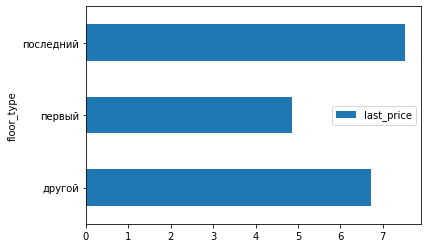

In [135]:
data_filtr.pivot_table(index='floor_type', values='last_price', aggfunc='mean').\
sort_values(by='floor_type').plot(kind='barh', fontsize=10)

Ограничим значения "усами"

<AxesSubplot:ylabel='floor_type'>

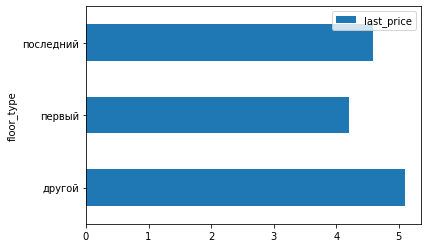

In [136]:
data_filtr.query('last_price <= 12').pivot_table(index='floor_type', values='last_price', aggfunc='mean').\
sort_values(by='floor_type').plot(kind='barh', fontsize=10)

В среднем самые дешевые квартиры находятся на "первом" этаже, самые дорогие на "других" этажах. Если включить в анализ и самые дорогие квартиры, результат изменится, самые дорогие квартиры будут на "последних" этажах, так как несколько самых дорогих квартир находят именно на последних этажах и вносят корректировку в диаграмму.

In [137]:
data_filtr.query('last_price > 200').pivot_table(\
index='floor_type', values='last_price', aggfunc=['count', 'mean'])# кол-во и средняя цена квартир на последнем этаже > 200 млн.

,count,mean
,last_price,last_price
floor_type,,
другой,3,291.666667
последний,6,390.589733


##### Рассмотрим зависимость общей (полной) стоимости от дня размещения объявления:

<AxesSubplot:ylabel='day_exposition'>

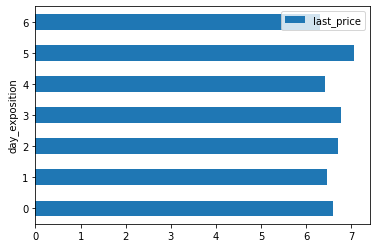

In [138]:
data_filtr.pivot_table(index='day_exposition', values='last_price', aggfunc='mean').\
sort_values(by='day_exposition').plot(kind='barh', fontsize=10)

Ограничим значения "усами"

<AxesSubplot:ylabel='day_exposition'>

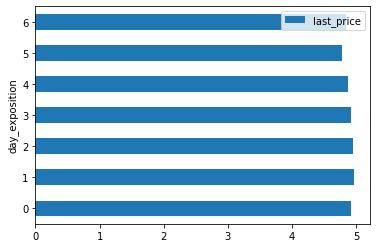

In [139]:
data_filtr.query('last_price <= 12').pivot_table(index='day_exposition', values='last_price', aggfunc='mean').\
sort_values(by='day_exposition').plot(kind='barh', fontsize=10)

In [140]:
data_filtr['day_exposition'].corr(data_filtr['last_price']) # вычислим коэффициент Пирсона

0.0010473972136151699

In [141]:
#Посчитаем коэффициент Пирсона для отфильтрованных данных

data_filtr.query('last_price <= 12')['day_exposition'].\
corr(data_filtr.query('last_price <= 12')['last_price'])

-0.01771522228564652

Из графика видно, что связи между общей площадью и днем размещения объявления практически нет. В данной базе данных виден пик по стоимости в субботу, в этот день размещено объявление о продаже самого дорого объекта недвижимости в базе данных.
Если мы отфильтруем стоимость по "усам" зависимость будет отрицательная (возможно падение цены в течение недели ближе к выходным), но тоже незначительная.

In [142]:
data_filtr.query('day_exposition == 5 and last_price > 200')# сделаем срез

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type,city_centers_nearest_r
12971,19,763.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,1.907500e+06,5,9,2017,4.0,последний,4.0
13749,7,240.0,410.0,2017-04-01,6,3.4,7.0,218.0,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0,5.853659e+05,5,4,2017,5.0,последний,5.0
14706,15,401.3,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,1.000748e+06,5,2,2016,2.0,последний,2.0


##### Рассмотрим зависимость общей (полной) стоимости от месяца размещения объявления:

<AxesSubplot:ylabel='month'>

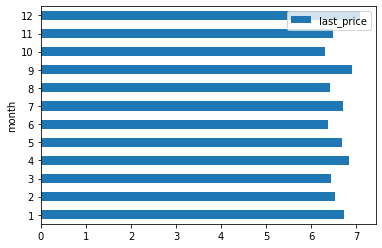

In [143]:
data_filtr.pivot_table(index='month', values='last_price', aggfunc='mean').\
sort_values(by='month').plot(kind='barh', fontsize=10)

In [144]:
data_filtr['last_price'].corr(data_filtr['month'])# вычислим коэффициент Пирсона

0.002002334216403477

In [145]:
#Посчитаем коэффициент Пирсона для отфильтрованных данных

data_filtr.query('last_price <= 12')['month'].\
corr(data_filtr.query('last_price <= 12')['last_price'])

0.004514602557854231

Ограничим значения "усами"

<AxesSubplot:ylabel='month'>

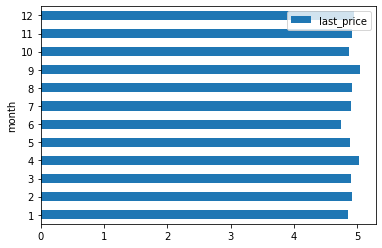

In [146]:
data_filtr.query('last_price <= 12').pivot_table(index='month', values='last_price', aggfunc='mean').\
sort_values(by='month').plot(kind='barh', fontsize=10)


Из графика видно, что связи между общей площадью и месяцем размещения объявления практически нет. В данной базе данных виден пик по стоимости в декабре.
Если мы отфильтруем стоимость по "усам" зависимость будет чуть выше, но отрицательная, останется 2 небольших пика в апреле и сентябре. Именно в эти периоды происходят сезонные изменения рынка недвижимости, спрос выше - выше цена.

##### Рассмотрим зависимость общей (полной) стоимости от года размещения объявления:

<AxesSubplot:ylabel='year'>

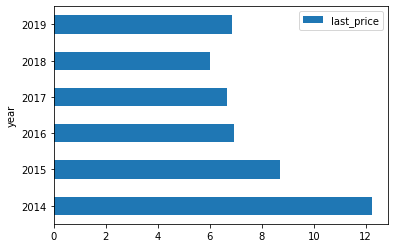

In [147]:
data_filtr.pivot_table(index='year', values='last_price', aggfunc='mean').\
sort_values(by='year').plot(kind='barh', fontsize=10)

Ограничим значения "усами"

<AxesSubplot:ylabel='year'>

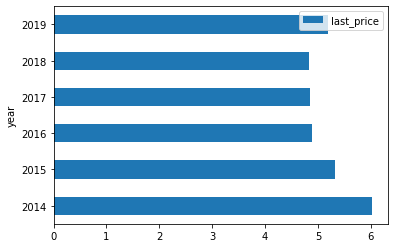

In [148]:
data_filtr.query('last_price <= 12').pivot_table(index='year', values='last_price', aggfunc='mean').\
sort_values(by='year').plot(kind='barh', fontsize=10)


In [149]:
data_filtr['last_price'].corr(data_filtr['year'])# вычислим коэффициент Пирсона

-0.04345193438233328

In [150]:
#Посчитаем коэффициент Пирсона для отфильтрованных данных

data_filtr.query('last_price <= 12')['year'].\
corr(data_filtr.query('last_price <= 12')['last_price'])

-0.004235380943522036

Выведем изменение некоторых параметров по годам для вывода:

In [151]:
#средняя стоимость кв.м. и средняя общая площадь
data_filtr.query('last_price <= 12').pivot_table(\
index=['year', 'floor_type'], aggfunc={'floor_type':'count', 'total_area': 'mean','square_meter_price':'mean'})#.

floor_type  square_meter_price  total_area
year floor_type                                            
2014 другой              63        99736.860262   65.264762
     первый              16        84470.047778   60.964375
     последний            9        89271.107608   61.992222
2015 другой             679        95104.675006   60.003976
     первый             146        78291.054803   56.788493
     последний          148        84139.363955   58.350743
2016 другой            1745        93031.717761   55.025450
     первый             346        78961.431493   55.191561
     последний          336        81963.536458   56.475149
2017 другой            5427        94334.936428   53.858589
     первый             913        76881.629473   53.001051
     последний          991        82673.925278   54.620303
2018 другой            5718        96813.642518   52.286744
     первый             981        78870.738782   52.881407
     последний         1039        82239.718649   55.440500
2019 другой            1892       102989.855405   52.851522
     первый             300        85486.527538   54.331433
     последний          356        92287.835748   51.256208

In [152]:
##средняя стоимость кв.м. и средняя общая площадь в зависимости от количества комнат в объекте
data_filtr.query('last_price <= 12 and rooms<=6').pivot_table(\
index=['year', 'rooms'], aggfunc={'rooms': 'count','total_area': 'mean','square_meter_price':'mean'})#.


rooms  square_meter_price  total_area
year rooms                                       
2014 1         26       118341.965414   43.253846
     2         28        91591.326499   60.902857
     3         26        83723.678920   78.810000
     4          6        71548.720462   97.150000
     5          2        95413.356010   91.600000
2015 0          3        91836.893636   25.800000
     1        293       101457.848489   38.635290
     2        329        89478.490269   56.455836
     3        279        83629.090983   74.617276
     4         54        81617.987869   94.562963
     5         13        83891.209255  117.684615
     6          2        93818.579725  121.850000
2016 0          4       103377.147718   24.125000
     1        874        98017.730933   37.723124
     2        833        88068.305415   55.215114
     3        570        81217.255662   71.545175
     4        119        80027.250783   92.273866
     5         23        71740.978912  118.730435
     6          4        72931.529159  134.625000
2017 0         98       105961.995918   28.106429
     1       2706        97335.427425   37.835998
     2       2567        89188.441486   54.929240
     3       1666        82836.060225   72.975588
     4        247        80497.804499   87.243765
     5         39        74007.510627  114.094872
     6          7        69669.883669  138.000000
2018 0         70       110072.125765   26.019714
     1       2980        99984.031302   37.397909
     2       2677        91059.094339   54.652335
     3       1713        83812.248505   71.535844
     4        255        79193.287475   83.410549
     5         36        73664.813740  116.130556
     6          6        86867.244608  115.116667
2019 0         17       112618.602569   27.605882
     1        893       108484.234538   37.211299
     2        931        98220.916752   53.861407
     3        617        89820.655363   69.782934
     4         79        87134.465335   81.980886
     5         11        74514.173849  105.927273

Text(0, 0.5, 'год 2014-2019')

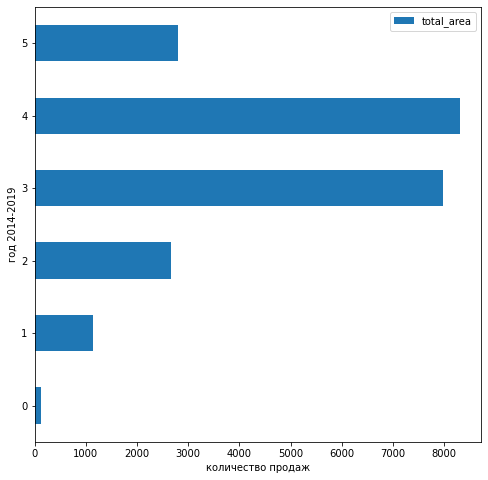

In [153]:
# построим диаграмму распределения кол-ва продаж по годам

data_filtr.pivot_table(index='year', values='total_area',  aggfunc='count').\
reset_index().plot(y='total_area', kind='barh', fontsize=10, figsize=(8,8))
plt.xlabel('количество продаж')
plt.ylabel('год 2014-2019') 

In [154]:
#Посмотрим сколько по годам не закрытых объявлений
data_filtr_day = data_filtr # пересохраним DF
data_filtr_day.loc[(data_filtr_day['days_exposition'].isna())]
data_filtr_day['days_exposition'] = data_filtr_day['days_exposition'].fillna('unklow')#заполним пропуски 'unklow'

data_filtr_day.query('last_price <= 12 and days_exposition=="unklow" ').pivot_table(\
index=['year', 'days_exposition', 'floor_type' ], aggfunc={'floor_type':'count','square_meter_price':'mean'})

floor_type  square_meter_price
year days_exposition floor_type                                
2014 unklow          другой               4       124987.318591
                     первый               1        58225.508318
                     последний            2       109686.627547
2015 unklow          другой              22        98954.070107
                     первый              10        65105.183702
                     последний            3       108967.955603
2016 unklow          другой              26        90165.154785
                     первый               8        96422.421724
                     последний           14        77562.104497
2017 unklow          другой             102       100062.193220
                     первый              49        76532.299044
                     последний           31        74525.855860
2018 unklow          другой             513        99204.861399
                     первый             124        77966.984689
                     последний          127        73488.105165
2019 unklow          другой            1111       101520.829764
                     первый             205        85871.767048
                     последний          225        87437.060793

При отсеивании очень дорогих квартир, видно, что с 2015 г был спад цен: в середине 2014г рынок недвижимости отреагировал на очередной виток кризиса: сократился спрос, снизился темп строительства, уменьшились рублевые цены, которые с учетом падения уровня жизни фактически выросли для большинства покупателей.
 Стабилизацию рынка можно увидеть с 2017 г. В 2017-2018 гг наблюдается резкий рост количества продаж. В 2019 году средняя общая стоимость подросла, но количество закрытых объявлений сильно просело: объявления еще были свежие, много не закрытых и в 2019 г на рынке наблюдался рост предложений, но спрос упал.

##### Вывод: из полученных данных можно сделать вывод, что такие факторы как:
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой)

-больше всего влияют на общую (полную) стоимость объекта общей площади - расположены по убвыванию связи. 

От факторов: дата размещения (день недели, месяц, год) общая (полная) стоимость объекта зависит меньше(реже), это большее глобальные факторы: сезонность и кризисы на рынке.


#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

##### Найдем 10 населённых пунктах с наибольшим числом объявлений

In [155]:
top_10_locality = data_filtr['locality_name'].value_counts().head(10) 
top_10_locality

Санкт-Петербург      15418
поселок Мурино         575
поселок Шушары         431
Всеволожск             391
Пушкин                 341
Колпино                328
поселок Парголово      325
деревня Кудрово        298
Гатчина                276
Выборг                 222
Name: locality_name, dtype: int64

##### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [156]:
data_filtr_top_10_locality = data_filtr.query('locality_name in @top_10_locality.index').\
pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean').sort_values(by='square_meter_price')
# в одной строке отфильруем нужные строки, сгруппируем

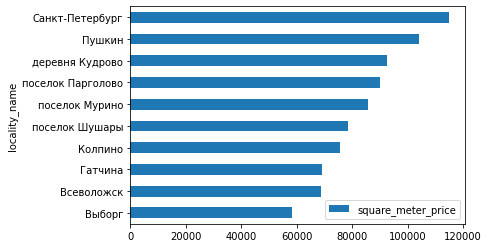

In [157]:
data_filtr_top_10_locality = data_filtr.query('locality_name in @top_10_locality.index').\
pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean').sort_values(by='square_meter_price').\
plot(kind='barh', fontsize=10) # в одной строке отфильруем нужные строки, сгруппируем и построим по данным график

В Санкт-Петербурге и городе Пушкин самые высокие стоимости квадратного метра, самые низкие в Гатчине, Всеволожске и Выборге. Санкт-Петербург выбивается по количеству объявлений, данные по нему будут более точные, сравнивать показатели лучше по н.п., где порядок выборки такой же.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра 

In [158]:
data_filtr_piter = data_filtr.query('locality_name == "Санкт-Петербург"') #выделим квартиры в Санкт-Петербурге
data_filtr_piter.head()# выведем результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type,city_centers_nearest_r
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,unklow,120370.370370,3,3,2019,16.0,другой,16.0
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,14.0,другой,14.0
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,7.0,другой,7.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,8.0,другой,8.0
7,5,7.915,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,unklow,110544.692737,3,4,2019,12.0,другой,12.0


In [159]:
# вычислим среднюю цену каждого километра
data_filtr_piter.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').reset_index()  

,city_centers_nearest_km,last_price
0,0.0,31.449116
1,1.0,21.196371
2,2.0,17.878759
3,3.0,11.154505
4,4.0,13.415401
5,5.0,14.550731
6,6.0,15.522603
7,7.0,14.826892
8,8.0,9.998414
9,9.0,7.041443


Посмотрим на графике распределение средней цены за километр


<AxesSubplot:>

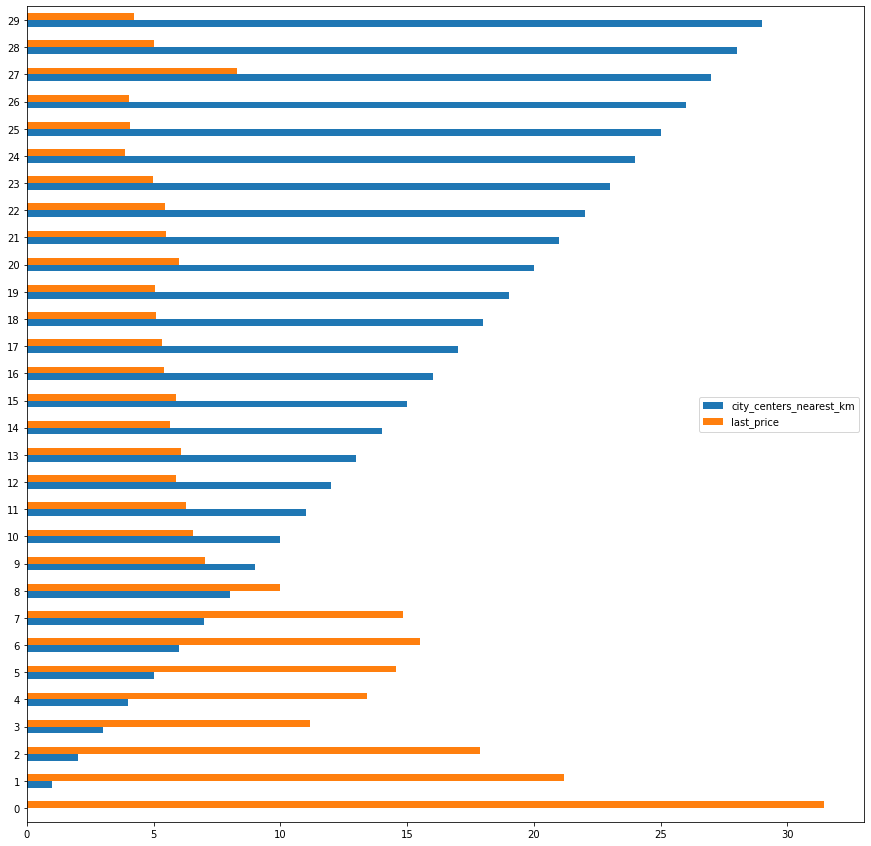

In [160]:
data_filtr_piter.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').\
reset_index().plot(kind='barh', fontsize=10, figsize=(15,15))

In [161]:
data_filtr_piter.loc[data_filtr_piter['city_centers_nearest_km']==27]# рассотрим данные по квартирам на 27ом км

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type,city_centers_nearest_r
748,13,14.35,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1,1496.0,0,NaN,128.0,193918.918919,1,11,2017,27.0,другой,27.0
5961,6,2.25,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0,NaN,0,NaN,178.0,70312.500000,1,2,2018,27.0,последний,27.0


In [162]:
data_filtr_piter.loc[data_filtr_piter['city_centers_nearest_km']==20].head()# рассмотрим данные по квартирам на 27ом км

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type,city_centers_nearest_r
397,15,5.990000,54.0,2018-03-22,2,NaN,36.0,21.4,28,False,False,False,18.7,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11.0,110925.925926,3,3,2018,20.0,другой,20.0
533,15,5.900000,67.4,2019-01-11,3,2.50,9.0,48.5,8,False,False,False,6.2,0,Санкт-Петербург,47531.0,20410.0,0,NaN,0,NaN,95.0,87537.091988,4,1,2019,20.0,другой,20.0
871,14,7.777777,75.0,2017-11-16,2,NaN,35.0,40.5,23,False,False,False,11.7,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,169.0,103703.693333,3,11,2017,20.0,другой,20.0
1697,11,3.550000,28.0,2018-02-08,1,2.65,34.0,18.0,23,False,False,False,NaN,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,410.0,126785.714286,3,2,2018,20.0,другой,20.0
1917,13,10.150000,74.0,2017-11-17,2,2.80,35.0,34.4,30,False,False,False,13.0,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,unklow,137162.162162,4,11,2017,20.0,другой,20.0


In [163]:
#посмотрим как распределились самые дорогие квартиры ко километрам
data_filtr_piter.loc[(data_filtr_piter['city_centers_nearest_km']<=29)& (data_filtr_piter['last_price']>=100)].\
pivot_table(index='city_centers_nearest_km', columns = 'floor_type', values='last_price', aggfunc='mean')

floor_type,другой,первый,последний
city_centers_nearest_km,,,
0.0,159.000000,NaN,NaN
1.0,206.666667,NaN,202.364200
2.0,133.333500,NaN,401.300000
4.0,147.000000,NaN,763.000000
5.0,187.967500,NaN,181.000000
6.0,164.426093,135.0,139.666667
7.0,128.500000,NaN,124.480000
8.0,NaN,NaN,420.000000


In [164]:
data_filtr_piter.loc[(data_filtr_piter['city_centers_nearest_km']<=29) \
& (data_filtr_piter['last_price']>=100), 'last_price'].count()# найдем их количество

36

Рассмотрим среднюю стоимость километра, отсеив выбивающиеся значения в общей стоимости:

<AxesSubplot:>

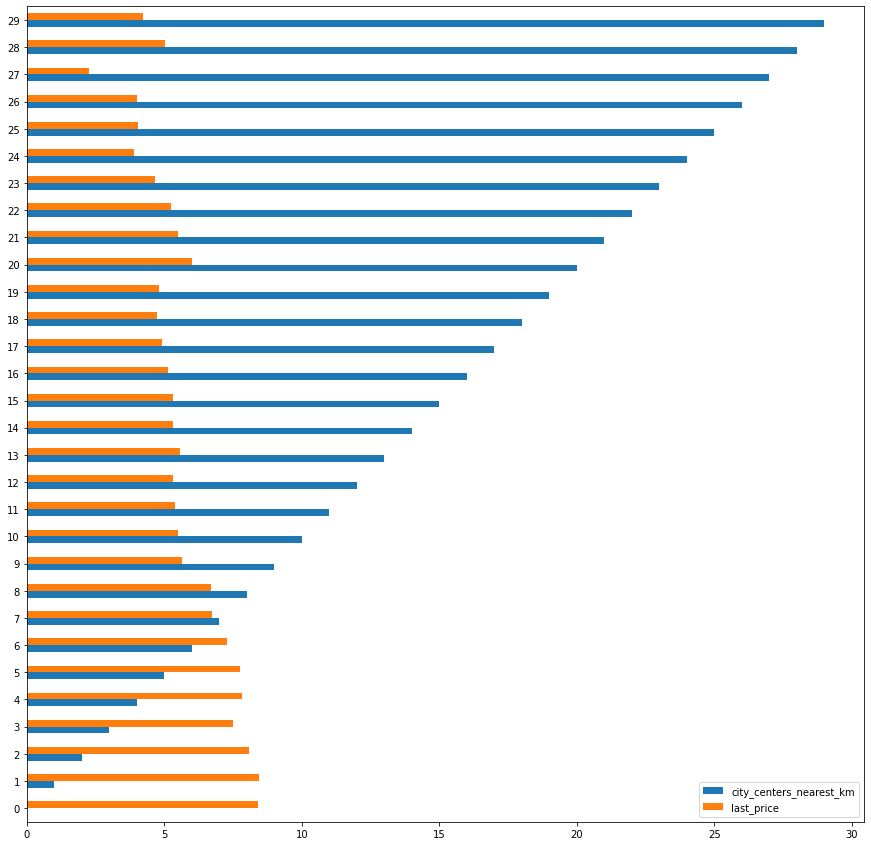

In [165]:
 #выделим квартиры в Санкт-Петербурге
data_filtr_piter_loow_price = data_filtr.query('locality_name == "Санкт-Петербург" and last_price<=12')
data_filtr_piter_loow_price.\
pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').reset_index().\
plot(kind='barh', fontsize=10, figsize=(15,15))


In [166]:
data_filtr_piter.loc[(data_filtr_piter['city_centers_nearest_km']==20) \
& (data_filtr_piter['last_price']<=12)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type,city_centers_nearest_r
397,15,5.990000,54.0,2018-03-22,2,NaN,36.0,21.4,28,False,False,False,18.7,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11.0,110925.925926,3,3,2018,20.0,другой,20.0
533,15,5.900000,67.4,2019-01-11,3,2.50,9.0,48.5,8,False,False,False,6.2,0,Санкт-Петербург,47531.0,20410.0,0,NaN,0,NaN,95.0,87537.091988,4,1,2019,20.0,другой,20.0
871,14,7.777777,75.0,2017-11-16,2,NaN,35.0,40.5,23,False,False,False,11.7,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,169.0,103703.693333,3,11,2017,20.0,другой,20.0
1697,11,3.550000,28.0,2018-02-08,1,2.65,34.0,18.0,23,False,False,False,NaN,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,410.0,126785.714286,3,2,2018,20.0,другой,20.0
1917,13,10.150000,74.0,2017-11-17,2,2.80,35.0,34.4,30,False,False,False,13.0,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,unklow,137162.162162,4,11,2017,20.0,другой,20.0


In [167]:
data_filtr_piter.loc[(data_filtr_piter['city_centers_nearest_km']==28) \
& (data_filtr_piter['last_price']<=12)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type,city_centers_nearest_r
814,0,7.600,111.0,2017-07-26,3,3.0,16.0,63.0,12,False,False,False,14.0,2,Санкт-Петербург,24685.0,28109.0,1,185.0,2,72.0,66.0,68468.468468,2,7,2017,28.0,другой,28.0
1111,0,4.072,38.0,2015-10-14,1,NaN,5.0,16.0,4,False,False,False,12.0,1,Санкт-Петербург,46919.0,28018.0,0,NaN,0,NaN,285.0,107157.894737,2,10,2015,28.0,другой,28.0
9572,0,3.413,43.0,2015-11-10,1,NaN,5.0,18.0,1,False,False,False,13.0,1,Санкт-Петербург,46919.0,28018.0,0,NaN,0,NaN,258.0,79372.093023,1,11,2015,28.0,первый,28.0
17798,0,4.990,71.0,2015-10-14,3,NaN,5.0,42.0,1,False,False,False,12.0,1,Санкт-Петербург,46919.0,28018.0,0,NaN,0,NaN,285.0,70281.690141,2,10,2015,28.0,первый,28.0
18941,0,3.666,39.0,2015-11-09,1,NaN,5.0,16.0,2,False,False,False,11.0,1,Санкт-Петербург,46919.0,28018.0,0,NaN,0,NaN,259.0,94000.000000,0,11,2015,28.0,другой,28.0
22916,0,5.144,64.0,2015-10-14,2,NaN,5.0,33.0,5,False,False,False,14.0,1,Санкт-Петербург,46919.0,28018.0,0,NaN,0,NaN,285.0,80375.000000,2,10,2015,28.0,последний,28.0
23145,17,6.300,92.0,2017-07-20,3,NaN,16.0,46.0,7,False,False,False,14.0,0,Санкт-Петербург,24590.0,28015.0,1,36.0,2,46.0,14.0,68478.260870,3,7,2017,28.0,другой,28.0


In [168]:
data_filtr_piter.loc[(data_filtr_piter['city_centers_nearest_km']==29) \
& (data_filtr_piter['last_price']<=12)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month,year,city_centers_nearest_km,floor_type,city_centers_nearest_r
10798,10,4.85,62.0,2017-05-16,3,NaN,5.0,35.7,1,False,False,False,7.5,2,Санкт-Петербург,14072.0,28644.0,0,NaN,0,NaN,63.0,78225.806452,1,5,2017,29.0,первый,29.0
11652,16,4.70,51.0,2016-06-07,2,2.60,5.0,30.0,1,False,False,False,8.0,0,Санкт-Петербург,14072.0,28644.0,0,NaN,0,NaN,539.0,92156.862745,1,6,2016,29.0,первый,29.0
12160,8,2.45,43.0,2018-08-14,1,2.75,5.0,16.0,1,True,False,False,NaN,0,Санкт-Петербург,26069.0,29493.0,0,NaN,0,NaN,8.0,56976.744186,1,8,2018,29.0,первый,29.0
13031,16,4.20,56.8,2018-07-04,2,3.50,3.0,27.9,1,False,False,False,10.8,0,Санкт-Петербург,25918.0,29343.0,0,NaN,0,NaN,187.0,73943.661972,2,7,2018,29.0,первый,29.0
16787,20,4.85,85.8,2019-04-22,3,3.60,3.0,49.4,2,False,False,False,12.0,0,Санкт-Петербург,25839.0,29263.0,0,NaN,0,NaN,unklow,56526.806527,0,4,2019,29.0,другой,29.0
19892,20,4.37,54.7,2016-03-23,3,2.50,5.0,32.8,5,False,False,False,7.1,1,Санкт-Петербург,14234.0,28806.0,0,NaN,0,NaN,939.0,79890.310786,2,3,2016,29.0,последний,29.0


Из первых графиков и таблиц сложно понять, отчего зависит средняя цена километра, мы наблюдаем в общем снижение при удалении от центра, но присутствуют несколько пиков. Для их объяснения рассмотрим все расстояния, применив фильтры.
Ограничим минимум общей цены для расчетов в 100млн, эта цена гораздо выше среднего, но еще не максимум.
Получили талбицу с средней стоимостью километра, дополнительно указав тип этажа.
Если сравнить 2 таблицы: первоначальную и отфильтрованную дополнительно, можем заметить, что как раз на километрах, где вбросы: 0, 1, 2, 4, 5, 6, 7, 8 находся очень дорогие объекты недвижимости, совпадающие по типам этажности с выброса на первоначальной диаграмме. Таких квартир всего 36, но за счет сверхвысокой стоимости они дают пики на диаграмме. Пики незначительны, на них больше влияет распределение объектов по типам этажей.

На 27 км видим скачок средней стоимости объектов недвижимости "другой" этажности. При детальном рассмотрении можно сделать вывод, что данный скачок обеспечил один объект недвижимости. На 27м км всего один объект с типом этажа "другой" и его средняя цена преобладает в несколько раз над ценой таких же объектов на соседних км. 
 Для подтверждения построим диаграмму, ограничив общую стоимость "усами". 
 На 3 км видим провал по общей стоимости и снижение доли объектов недвижимости на этажах типа 'последний' и 'другой', возможно здесь находятся старые районы, застроенные домами небольшой этажности, которые уже в плохом состоянии. Затем рост с 4 км по 8 км. Пик на 8 км обеспечил объект недвижимости ценой в 420 млн. и опять уменьшение доли объектов недвижимости на этажах типа 'первый'- возможно это район с новыми кварталами, где высотная застройка.


После удаления сверхдорогих квартир имеем следующее:
    по графику видим небольшое проседание на 3 км, на этом удалении находятся старые районы, возможно жилой фонд уже устарел, и много домов нуждаются в ремонте, так же в старых районах возможна застройка хрущевками, их цена так же обычно ниже. Далее от центра возможно находятся новые районы с высотной застройкой, поскольку расстояние еще небольшое от центра и дома в лучшем состоянии, видим всплеск. Так же имеем пик на 20 и 28 км. На 20 км имеем пик, так как на этом километре преобладают квартриры на "другийх" этажах, т.е. по статистике выше по стоимости. На 28 км преобладают квартиры на "последних" этажах, они немного ниже по цене, чем на "других" этажах, но тем неменее делают вклад в повышение средней стоимости за км.м. Так же пик на 28 км обеспечивают объявления в основном 2015 года, когда средняя стоимость за квадратной метр была высокой, объявления размещены в сезон высокого спроса, что так же увеличивает стоимость. Провал на 27 км из-за того, что на этом километре всего одно объявление, и цена объекта низкая. 
    


### Общий вывод

   Вывод(ура!): в нашем распоряжении были данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Стоит отметить, что подавляющее число объявлений относится к Санкт-Петербургу, поэтому все выводы в большей степени относятся к нему. Остальные населенные пункты было бы разумно проанализировать отдельно. 
При анализе отдельных параметров выявили такие факты:
Больше всего объявлений объектов недвижимости с общей площадью 30-70 кв.м.(жилая площадь 15-42 кв.м) большая часть это 2х комнатные объекты недвижимости, потом идут 1 комнатные, затем 3х комнатные и т.д. по убыванию. Наиболее частовстречающаяся площадь кухни для 1 - 2х комнатных объектов недвижимости 6.8 и 10 кв.м. В основном общая стоимость объектов недвижимости находится в интервале 3.4-6.8 млн, в данной базе также много очень дорогих квартир, тогда как более дешевые квартиры встречаются реже.

Основная часть объектов недвижимости находится с 1 по 5 этаж, начиная с 6 этажа и выше количество падает; располжена чаще всего  в 5и и 9и этажных домах.
Основная часть недвижимости находится на удалении от центра 9 - 16 км. С увеличением расстояния от центра количество объектов уменьшается. Наблюдается небольшой провал на расстоянии 5-11 км, минимум на 7 км, так как распределение в основном  обеспечивает Санкт-Петербург, вероятнее всего это связано с близостью к большому по площади водоему. Пик на 17ом км - к объектам в Санкт-Петербурге добавляются объекты соседних н.п

При анализе зависимости общей стоимости от параметров получили, что сильнее всего она зависит, т.е. растет при росте параметра, от (по убыванию связи):
 - жилая площадь;
 - площадь кухни;
 - количество комнат;
 Так же стоимость зависит от этажа, на котором расположена квартира: первый, последний, другой. В среднем самые дешевые квартиры находятся на "первом" этаже, самые дорогие на "других" этажах.

От факторов: дата размещения (день недели, месяц, год) общая (полная) стоимость объекта зависит меньше(реже), это большее глобальные факторы: сезонность (высокий спрос, а значит и выше цена, с февраля по апрель и с сентября по декабрь) и кризисы на рынке (в данном случае в 2014 г). Чаще всего объявления размещались в рабочие дни, к выходным стоимость незначительно снижается.

Среднее количество дней, за которое происходила продажа (количество дней размещения объявления) - 182 дня, медиана 96 дней: медиана в этом случае более показательна, так как имеем большой разброс по дням размещения. Быстрые продажи происходят в течении 45 дней. Необычно долгие продажи начинаются от 515 дней.
Нашли н.п. пункты с самой высокой средней стоимостью квадратного метра - это Санкт-Петербург и город Пушкин. Самые низкие в Гатчине, Всеволожске и Выборге. Это исследование показало, что географическое расположение очень сильно влияет на общую стоимость, цена квадратного метра в Санкт-Питербурге в 1.5-2 раза превышает стоимость в соседних н.п.

Исследование стоимости каждого километра в Санкт-Петербурге показало, что она зависит напрямую от удаленности о центра, возможны погрешности, они зависят больше от третьих факторов, тех, что мы указали выше. Эту картину нарушают очень дорогие квартиры с большой площадью и большим количеством комнат, но они единичны.
